# Ownership of the topics 

Analysing the politicians posts and the topics that each party own and wich topics they have in commun.

In [ ]:
import pandas as pd

In [ ]:
#Import data
posts = pd.read_csv('posts_con_topicos.csv')

In [ ]:
#Unifying the ids of the users (each user might have a different name in each social plataform)
user_id = {'cristinafkirchner': "cfk", 
'mauriciomacri': "macri", 
'kicillofok': "kicillof", 
'mariuvidal':  "vidal", 
'santiagoacafiero':  "cafiero", 
'horaciorodriguezlarreta': "larreta", 
'patobullrich': "pbullrich", 
'elisalilitacarrio': "carrio", 
'wadodecorrido': "wado", 
'gugalusto': "lusto", 
'gabicerru': "carruti", 
'marioraulnegri': "negri", 
'diegosantilliok': "satilli", 
'luisalfredojuez': "juez", 
'jorgemacri': "jmacri", 
'facundomoyanook': "moyano", 
'vikidonda': "donda", 
'waldowolff': "wolff", 
'rody.suarez': "suarez", 
'leon_grosso': "grosso", 
'fernandoiglesias1957':"iglesias" , 
'cristianritondo': "titondo", 
'bordetgustavo': "bordet", 
'sergiounac': "unac", 
'ocanagraciela': "ocana", 
'itai_hagman': "hagman", 
'anabelfsagasti': "sagasti", 
'gustavo_posse': "posse", 
'nestor.grindetti': "grindetti", 
'alfredocornejo': "cornejo", 
'oscar.parrilli': "parrilli", 
'gerardomoralesjujuy': "morales", 
'gildoinsfran': "insfran", 
'brendalisaustin': "lisaustin", 
'gabriel_katopodis': "katopodis", 
'omarperotti': "perotti", 
'alfredodeangeli': "deangeli", 
'fvallejoss': "vallejos", 
'joseluisgioja': "gioja", 
'juanluismanzur': "manzur", 
'maxiferraro': "ferraro", 
'luisnaidenoff': "naidenoff", 
'pablocarrook': "carro", 
'lucia.corpacci': "corpacci", 
'pyedlin': "yedlin", 
'humbertoschiavoni': "hshiavioni", 
'alfredoschiavoni': "ashiavoni", 
'vascodemendiguren': "mendiguren", 
'jromero58': "romero", 
'alferdezok': "fernadez", 
'LuisAlfredoJuez': "juez", 
'CFKArgentina': "cfk", 
'meugeniavidal': "vidal", 
'bullrichpatricia': "pbullrish", 
'WolffWaldo': "wolff", 
'GobernadorGerardoMorales': "morales", 
'GugaLusto': "lusto", 
'graciela.ocana': "ocana", 
'Mario.Raul.Negri': "negri", 
'Elisa.Lilita.Carrio': "carrio", 
'SantiCafiero': "cafiero", 
'faiglesias': "iglesias", 
'GabrielaCerruti': "cerruti", 
'CristianRitondo': "ritondo", 
'ItaiHagman': "hagman", 
'RodolfoSuarezMendoza': "suarez" , 
'DiegoColoSantilli': "santilli", 
'gustavoposse': "posse", 
'CornejoAlfredo': "cornejo", 
'sergio.unac': "unac", 
'GildoInsfranGobernador': "insfran" , 
'nestorgrindetti': "grindetti", 
'ferraromaxi': "ferraro", 
'JuanManzurOficial': "manzur", 
'FacundoMoyanoOficial': "moyano", 
'AnabelFSagasti': "sagasti", 
'grossoleonardo': "grosso", 
'FernandaVallejosUC': "vallejos", 
'corpaccilucia': "corpacci", 
'OscarParrilliNQN': "parrilli", 
'gabrielkatopodis': "katopodis", 
'PabloYedlinOficial': "yedlin", 
'humberto.schiavoni': "hshiavoni", 
'dmvasco': "vasco", 
'JorgeAntonioRomero2017': "romero" , 
'PabloCarroOk': "carro", 
'LuciaCorpacci': "corpacci", 
'Leonardo_Grosso': "grosso", 
'Facundo_Moyano':  "moyano", 
'jromero581': "romero", 
'Kicillofok': "kicillof", 
'bordet': "bordet", 
'insfran_gildo': "insfran", 
'JuanManzurOK': "manzur", 
'alferdez': "fernandez", 
'gkatopodis': "katopodis", 
'OscarParrilli': "parrilli", 
'Maxiferraro': "ferraro", 
'FerIglesias': "iglesias", 
'ljuez': "juez", 
'gracielaocana': "ocana" , 
'Alfreschiavoni': "ashiavoni", 
'GerardoMorales': "morales", 
'rodysuarez': "suarez", 
'horaciorlarreta': "larreta", 
'SchiavoniH': "hshiavoni", 
'diegosantilli': "santilli", 
'elisacarrio': "carrio", 
'Nestorgrindetti': "grindetti", 
'PatoBullrich': "pbullrich"}


posts["user"] = [user_id[user] for user in posts.User_Name]

In [ ]:
#Finding how much a topic is used by each user in each social plataform
proportions = {}
for user in posts.user.unique():
    prop_user = {}
    for red in posts[posts.user == user].red.unique():
        prop_user[red] = posts.groupby(by=["user","red"]).topic1.count()[user][red] / posts.groupby(by=["user","red"]).topic1.count()[user].sum()
        proportions[user] = prop_user

In [ ]:
from tqdm import tqdm

In [ ]:
#Creating a dataframe whith how many post each user has about each topic in each social plataform
data_norm = posts.groupby(by=["user","topic1","red"]).size()
data_norm = data_norm.astype(float)
display(data_norm.head())
for user in tqdm(posts.user.unique()):
    for topic in posts[posts.user== user].topic1.unique():
        for red in posts[(posts.user== user) & (posts.topic1== topic)].red.unique():
            data_norm[user,topic,red]/= proportions[user][red]
display(data_norm.head())

user       topic1  red
ashiavoni  0.0     ig     1.0
           3.0     fb     1.0
                   tw     1.0
           4.0     fb     2.0
                   ig     2.0
dtype: float64

100%|██████████| 57/57 [02:00<00:00,  2.12s/it]


user       topic1  red
ashiavoni  0.0     ig     4.069307
           3.0     fb     3.396694
                   tw     2.174603
           4.0     fb     6.793388
                   ig     8.138614
dtype: float64

In [ ]:
import numpy as np

In [ ]:
df_norm = pd.DataFrame(data = [[i[0],i[1],i[2]] for i in data_norm.index.values], columns = ["user","topic1","red"])
df_norm["posts"] = data_norm.tolist() 

In [ ]:
#Finding the topics that each party own and wich they have in commun
topic1_FT = posts[posts['lado']=='FT']['topic1'].value_counts()
topic1_PRO = posts[posts['lado']=='PRO']['topic1'].value_counts()
topics = []
ft=[]
pro=[]
diff=[]
for i in range(0,1028):
    topics.append(i)
    if i in topic1_FT.keys():
        ft.append(topic1_FT[i])
    else:
        ft.append(0)
    
    if i in topic1_PRO.keys():
        pro.append(topic1_PRO[i])
    else:
        pro.append(0)
    diff.append(abs(pro[i]-ft[i]))
    
d={'Oficialismo':ft,'Oposición':pro,'Diferencia':diff}
frecuencyu_diff = pd.DataFrame(data=d,index=topics)

frecuencyu_diff['total'] = frecuencyu_diff['Oficialismo']+frecuencyu_diff['Oposición']
frecuencyu_diff['porcentaje_ft'] = frecuencyu_diff['Oficialismo']/frecuencyu_diff['total']
frecuencyu_diff['porcentaje_op'] = frecuencyu_diff['Oposición']/frecuencyu_diff['total']

comunes = frecuencyu_diff[(frecuencyu_diff['porcentaje_ft'] < 0.55) & (frecuencyu_diff['porcentaje_op'] < 0.55)]
propios = frecuencyu_diff[(frecuencyu_diff['porcentaje_ft'] > 0.95) | (frecuencyu_diff['porcentaje_op'] > 0.95)]

In [ ]:
#Measuring how meany topics they have in commun in each social plataform
rv = {red:0 for red in df_norm.red.unique()}
for topic in tqdm(comunes.index):
    rv[df_norm[df_norm.topic1 == topic].groupby(by="red").posts.sum().idxmax()] += 1
print(rv)

100%|██████████| 130/130 [00:00<00:00, 267.93it/s]

{'ig': 36, 'fb': 21, 'tw': 73}


In [ ]:
#Measuring how meany topics they own in each social plataform
rv = {red:0 for red in df_norm.red.unique()}
for topic in tqdm(propios.index):
    rv[df_norm[df_norm.topic1 == topic].groupby(by="red").posts.sum().idxmax()] += 1
print(rv)

100%|██████████| 44/44 [00:00<00:00, 602.18it/s]

{'ig': 18, 'fb': 15, 'tw': 11}


In [ ]:
import matplotlib.pyplot as plt

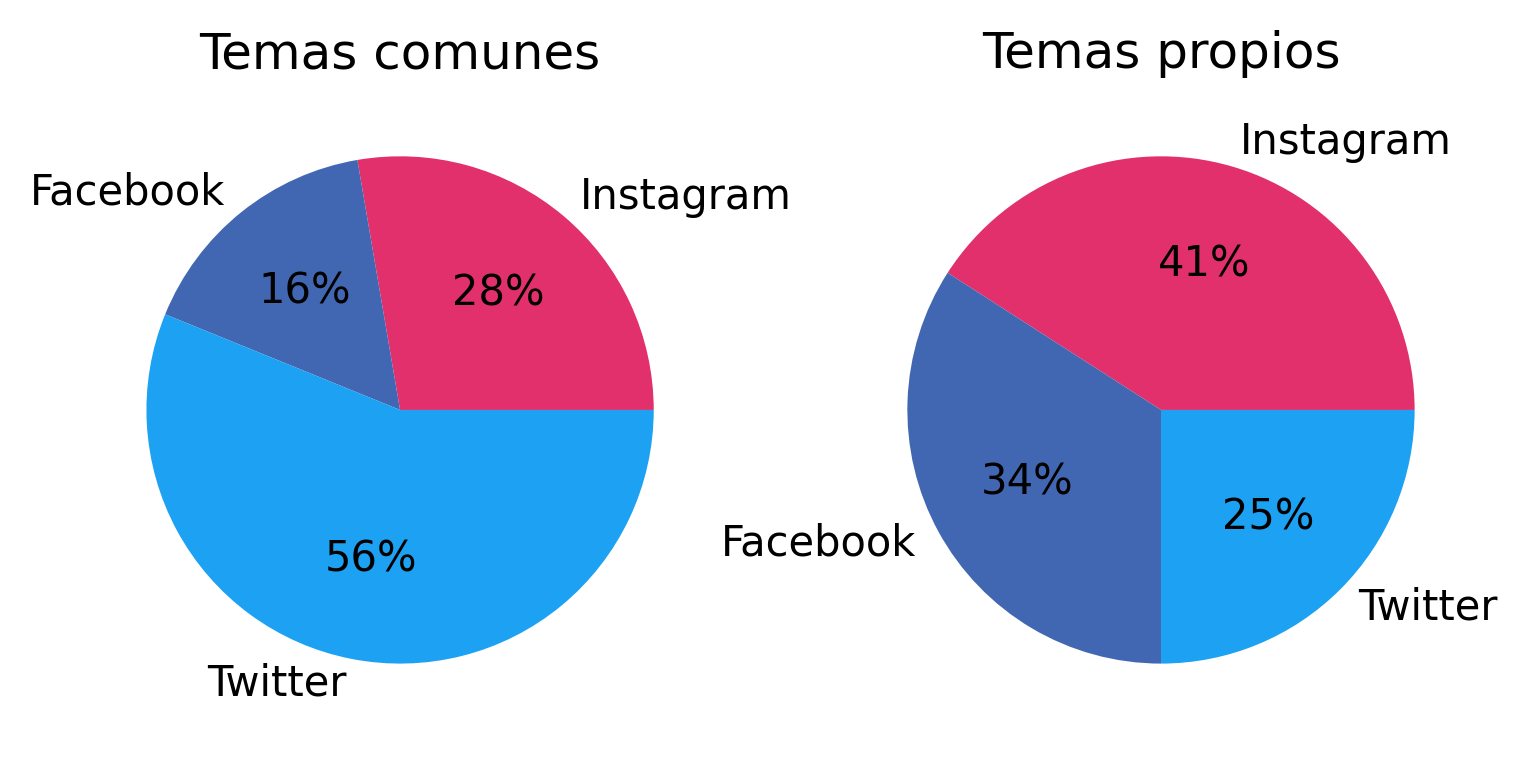

In [ ]:
#Making the plots
fig, axs = plt.subplots(1, 2, dpi=300)
axs[0].set_title("Temas comunes")
axs[0].pie([36,21,73], colors=[ "#E1306C","#4267B2", "#1DA1F2"], labels=["Instagram","Facebook","Twitter"], autopct='%1.0f%%')
axs[1].set_title("Temas propios")
axs[1].pie([18,15,11], colors=[ "#E1306C","#4267B2", "#1DA1F2"], labels=["Instagram","Facebook","Twitter"], autopct='%1.0f%%')
plt.savefig('temas_propios_comunes.jpg')

In [ ]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
